<a href="https://colab.research.google.com/github/purvikabajaj/Neural-Networks/blob/master/Handwriting_MNIST_using_logs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [31]:
def train():
  class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
      if(logs.get('loss')<0.4):
        print('\nCancelling training because loss<0.4\n')
        self.model.stop_training = True

  callbacks = myCallbacks()
  mnist = tf.keras.datasets.mnist

  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = x_train/255.0
  x_test = x_test/255.0

  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')]
  )
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  history = model.fit(x_train, y_train, epochs=5, callbacks = [callbacks])

  return history.epoch, history.history['accuracy'][-1], model.evaluate(x_test, y_test), np.argmax(model.predict(x_test)[0]), plt.imshow(x_test[0].reshape(28,28),cmap='Greys'), plt.show()

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1860/1875 [============================>.] - ETA: 0s - loss: 0.2567 - accuracy: 0.9267
Cancelling training because loss<0.4

313/313 [==============================] - 1s 3ms/step - loss: 0.1344 - accuracy: 0.9607


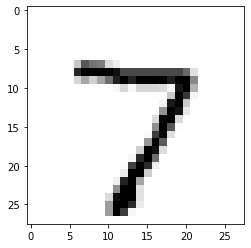

([0],
 0.9268500208854675,
 [0.13442304730415344, 0.9606999754905701],
 7,
 None)

In [32]:
train()